In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle

import sys, os
sys.path.append('../../src')
import tester.tester as Tester

In [2]:
def compute_plot_statistics(plot_dict):
    prc_25 = list()
    prc_50 = list()
    prc_75 = list()

    # Buffers for plots
    current_step = list()
    current_25 = list()
    current_50 = list()
    current_75 = list()
    steps = list()

    for step in plot_dict.keys():
        if len(current_step) < 10:
            current_25.append(np.percentile(np.array(plot_dict[step]),25))
            current_50.append(np.percentile(np.array(plot_dict[step]),50))
            current_75.append(np.percentile(np.array(plot_dict[step]),75))
            current_step.append(sum(plot_dict[step])/len(plot_dict[step]))
        else:
            current_step.pop(0)
            current_25.pop(0)
            current_50.pop(0)
            current_75.pop(0)
            current_25.append(np.percentile(np.array(plot_dict[step]),25))
            current_50.append(np.percentile(np.array(plot_dict[step]),50))
            current_75.append(np.percentile(np.array(plot_dict[step]),75))
            current_step.append(sum(plot_dict[step])/len(plot_dict[step]))

        prc_25.append(sum(current_25)/len(current_25))
        prc_50.append(sum(current_50)/len(current_50))
        prc_75.append(sum(current_75)/len(current_75))
        steps.append(step)

    # for step in plot_dict.keys():
    #     steps.append(step)
    #     prc_25.append(np.percentile(np.array(plot_dict[step]), 25))
    #     prc_50.append(np.percentile(np.array(plot_dict[step]),50))
    #     prc_75.append(np.percentile(np.array(plot_dict[step]),75))

    max_x = np.amax(steps)

    return steps, prc_25, prc_50, prc_75, max_x

In [3]:
# Load the rendezvous experiment data
base_file_path = os.path.abspath(os.getcwd())

save_data_file_list = []
save_data_file_list.append(os.path.join(base_file_path, 'dqprm_10_agent_rendezvous.p'))
save_data_file_list.append(os.path.join(base_file_path, 'ihrl_10_agent_rendezvous.p'))
save_data_file_list.append(os.path.join(base_file_path, 'iql_10_agent_rendezvous.p'))

color_list = ['#3F5D7D', 'red', 'green', 'magenta']
label_list = ['DQPRM', 'h-IL', 'IQL', 'CQRM']
line_style_list = ['-','--','-.', (0, (1, 0.25))]

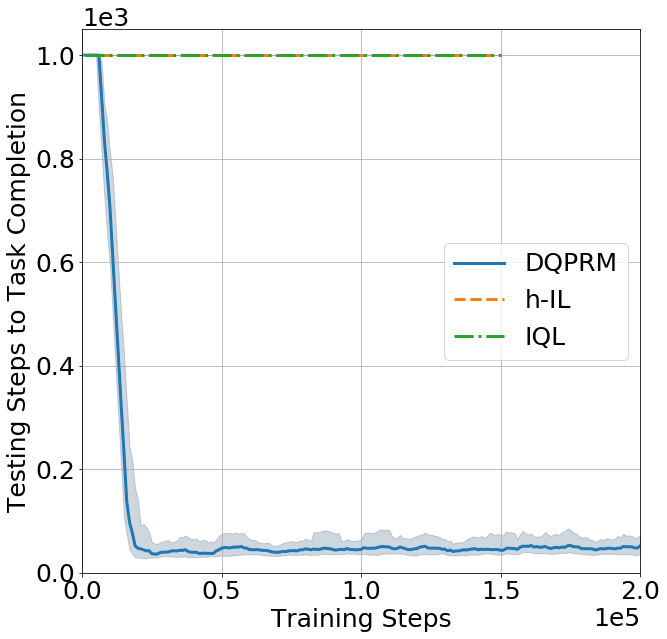

In [4]:
fig, ax = plt.subplots(figsize=(10,10))
plt.grid()

fontsize = 25

for i in range(len(save_data_file_list)):
    file_string = save_data_file_list[i]
    color = color_list[i]
    label = label_list[i]
    style = line_style_list[i]
    # load the data
    save_file = open(file_string, "rb")
    tester = pickle.load(save_file)

    plot_dict = tester.results['testing_steps']
    steps, prc_25, prc_50, prc_75, max_x = compute_plot_statistics(plot_dict)

    plt.plot(steps, prc_25, color=color, alpha=0)
    plt.plot(steps, prc_75, color=color, alpha=0)
    plt.fill_between(steps, prc_50, prc_25, color=color, alpha=0.25)
    plt.fill_between(steps, prc_50, prc_75, color=color, alpha=0.25)
    plt.plot(steps, prc_50, linewidth=3, label=label, linestyle=style)

plt.ylabel('Testing Steps to Task Completion', fontsize=fontsize)
plt.xlabel('Training Steps', fontsize=fontsize)
# plt.title('Two-Agent Rendezvous Task', fontsize=fontsize)
plt.locator_params(axis='x', nbins=5)

plt.xlim(0, 2e5)
plt.ylim(0, 1050)

plt.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
ax.xaxis.get_offset_text().set_fontsize(fontsize)
ax.yaxis.get_offset_text().set_fontsize(fontsize)

plt.legend(fontsize=fontsize)

plt.show()

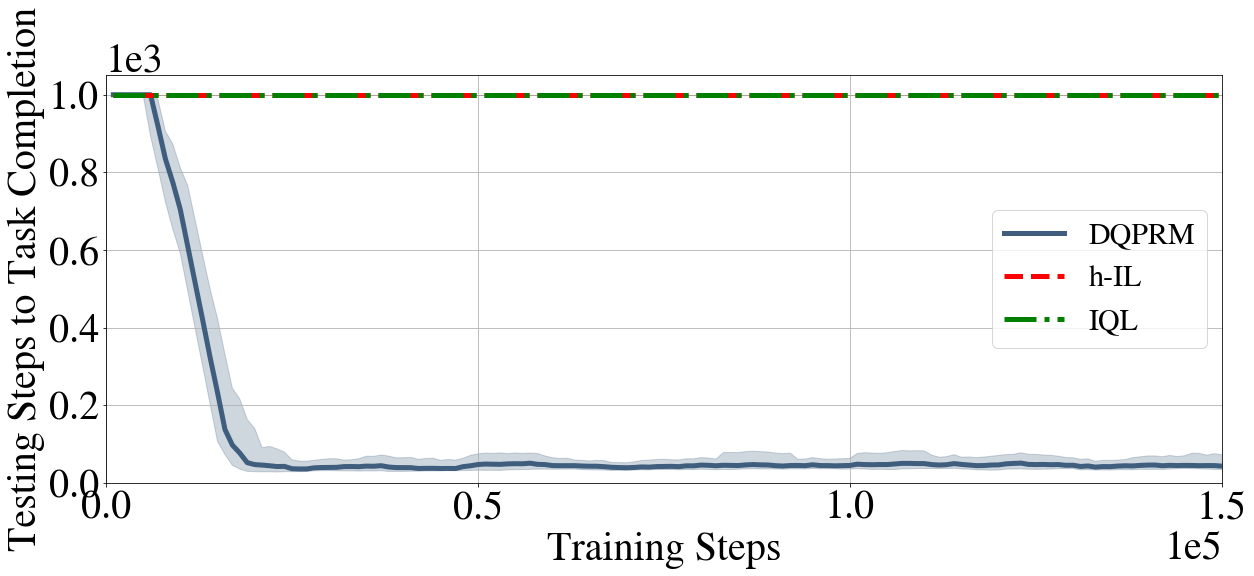

In [5]:
# import matplotlib
# matplotlib.rcParams['mathtext.fontset'] = 'custom'
# matplotlib.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
# matplotlib.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
# matplotlib.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
# matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')

import matplotlib
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
# matplotlib.pyplot.title(r'ABC123 vs $\mathrm{ABC123}^{123}$')

fig, ax = matplotlib.pyplot.subplots(figsize=(20, 7.5))
matplotlib.pyplot.grid()

fontsize = 40

for i in range(len(save_data_file_list)):
    file_string = save_data_file_list[i]
    color = color_list[i]
    label = label_list[i]
    style = line_style_list[i]
    # load the data
    save_file = open(file_string, "rb")
    tester = pickle.load(save_file)

    plot_dict = tester.results['testing_steps']
    steps, prc_25, prc_50, prc_75, max_x = compute_plot_statistics(plot_dict)

    matplotlib.pyplot.plot(steps, prc_25, color=color, alpha=0)
    matplotlib.pyplot.plot(steps, prc_75, color=color, alpha=0)
    matplotlib.pyplot.fill_between(steps, prc_50, prc_25, color=color, alpha=0.25)
    matplotlib.pyplot.fill_between(steps, prc_50, prc_75, color=color, alpha=0.25)
    matplotlib.pyplot.plot(steps, prc_50, color=color, linewidth=5, label=label, linestyle=style)

matplotlib.pyplot.ylabel('Testing Steps to Task Completion', fontsize=fontsize)
matplotlib.pyplot.xlabel('Training Steps', fontsize=fontsize)
# matplotlib.pyplot.title('Three-Agent Rendezvous Task', fontsize=fontsize)
matplotlib.pyplot.locator_params(axis='x', nbins=5)

matplotlib.pyplot.ticklabel_format(axis='x', style='sci', scilimits=(0,0))
matplotlib.pyplot.ticklabel_format(axis='y', style='sci', scilimits=(0,0))
matplotlib.pyplot.xticks(fontsize=fontsize)
matplotlib.pyplot.yticks(fontsize=fontsize)
ax.xaxis.get_offset_text().set_fontsize(fontsize)
ax.yaxis.get_offset_text().set_fontsize(fontsize)

matplotlib.pyplot.xlim(0, 15e4)
matplotlib.pyplot.ylim(0, 1050)

matplotlib.pyplot.legend(fontsize=30)

matplotlib.pyplot.show()